In [122]:
!pip install gym

In [130]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random

In [124]:
class GridEnvironement(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(36) #3 by 3 grid , this will be changed to 36
        self.action_space = spaces.Discrete(4) # 4 actions = up, down, right, left
        self.max_timesteps = 25 # change this later as we see fit .
        
    def include_images_reward(self):
        pass
    def grid_coloring(self):
        # Color for rewards location
        self.r1 = [0, 2]
        self.nr1 = [1, 3]
        self.r2 = [2, 0]
        self.r3 = [5, 0]
        self.nr2 = [2 ,2]
        self.r4 = [2, 5]
        self.nr3 = [4, 1]
        self.nr4 = [4, 4]
        self.r5 = [5, 2]
        # Positive Rewards
        self.state[tuple(self.r1)] = 0.2
        self.state[tuple(self.r2)] = 0.2
        self.state[tuple(self.r3)] = 0.2
        self.state[tuple(self.r4)] = 0.2
        self.state[tuple(self.r5)] = 0.2
        # Negative Rewards with different color.
        self.state[tuple(self.nr1)] = 0.8
        self.state[tuple(self.nr2)] = 0.8
        self.state[tuple(self.nr3)] = 0.8
        self.state[tuple(self.nr4)] = 0.8
    def earn_reward(self):
        if (self.agent_pos == self.goal_pos).all():
            self.reward=100 # reaching the goal is +10 rewards. 
        elif (self.agent_pos == self.r1).all(): # which position has more reward than the other.
            self.reward =3
        elif (self.agent_pos == self.nr1).all():
            self.reward=-3
        elif (self.agent_pos == self.r2).all():
            self.reward=3
        elif (self.agent_pos == self.r3).all():
            self.reward=7
        elif (self.agent_pos == self.nr2).all():
            self.reward=-5
        elif (self.agent_pos == self.r4).all():
            self.reward=7
        elif (self.agent_pos == self.nr3).all():
            self.reward=-7
        elif (self.agent_pos == self.nr4).all():
            self.reward=-9
        elif (self.agent_pos == self.r5).all():
            self.reward = 10
        else:
            self.reward = 0
    def grid_coloring(self):
        # Color for rewards location
        self.r1 = [0, 2]
        self.nr1 = [1, 3]
        self.r2 = [2, 0]
        self.r3 = [5, 0]
        self.nr2 = [2 ,2]
        self.r4 = [2, 5]
        self.nr3 = [4, 1]
        self.nr4 = [4, 4]
        self.r5 = [5, 2]
        # Positive Rewards
        self.state[tuple(self.r1)] = 0.2
        self.state[tuple(self.r2)] = 0.2
        self.state[tuple(self.r3)] = 0.2
        self.state[tuple(self.r4)] = 0.2
        self.state[tuple(self.r5)] = 0.2
        # Negative Rewards with different color.
        self.state[tuple(self.nr1)] = 0.8
        self.state[tuple(self.nr2)] = 0.8
        self.state[tuple(self.nr3)] = 0.8
        self.state[tuple(self.nr4)] = 0.8
        
    def reset(self):
        self.reward = 0
        self.done = False
        self.timestep = 0 # initial value for timestep
        self.agent_pos = [0, 0]
        self.goal_pos = [5, 5] # this will be changed to [5, 5] when grid is 6 by 6
        self.state = np.zeros((6,6)) # this will be changed to (6, 6)
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.grid_coloring()
        
        observation = self.state.flatten() # flatten into one dim
        return observation
    
    def step(self, action):
        if action == 0:
            self.agent_pos[0] +=1 # down
        if action == 1:
            self.agent_pos[0] -=1 # up
        if action == 2:
            self.agent_pos[1] +=1 # right
        if action == 3:
            self.agent_pos[1] -=1 # left
        
        self.agent_pos = np.clip(self.agent_pos, 0, 5) # 0 is min and max is 2 ==> 5, edge cases
        self.state = np.zeros((6, 6))
        #coloring
        # Positive Rewards
        self.state[tuple(self.r1)] = 0.2
        self.state[tuple(self.r2)] = 0.2
        self.state[tuple(self.r3)] = 0.2
        self.state[tuple(self.r4)] = 0.2
        self.state[tuple(self.r5)] = 0.2
        # Negative Rewards with different color.
        self.state[tuple(self.nr1)] = 0.8
        self.state[tuple(self.nr2)] = 0.8
        self.state[tuple(self.nr3)] = 0.8
        self.state[tuple(self.nr4)] = 0.8
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        observation = self.state.flatten() # flatten into one dim
        
        # Utilize this function to add more reward.
        self.earn_reward()
        
        self.timestep+=1 # increment the step
        
        done = True if self.timestep >= self.max_timesteps else False
        info = {'time_steps':self.timestep, 'agent_pos':self.agent_pos}
        
        return observation, self.reward, done, info
    
    def render(self):
        plt.imshow(self.state)
        

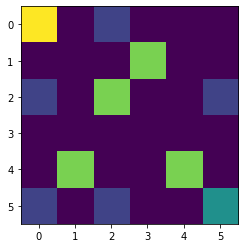

In [125]:
env = GridEnvironement()
env.reset()
env.render()

Reward: 0
[[0.  1.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0. ]
 [0.2 0.  0.8 0.  0.  0.2]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.8 0. ]
 [0.2 0.  0.2 0.  0.  0.5]]


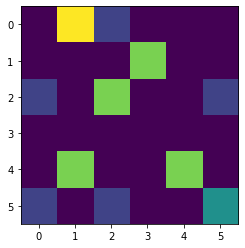

In [126]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()
print(env.state)

Reward: 3
[[0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0. ]
 [0.2 0.  0.8 0.  0.  0.2]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.8 0. ]
 [0.2 0.  0.2 0.  0.  0.5]]


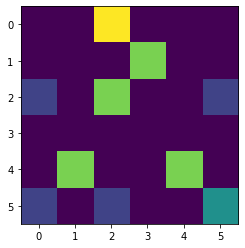

In [127]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
#env.reset()
env.render()
print(env.state)

Reward: -5


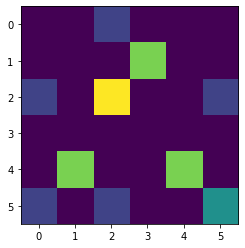

In [129]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -2


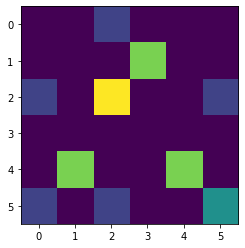

In [8]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -2


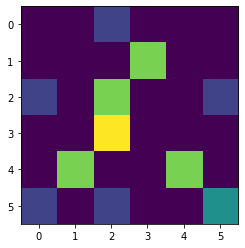

In [9]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -9


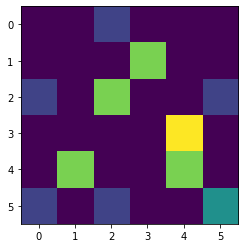

In [13]:
action = 1
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -9


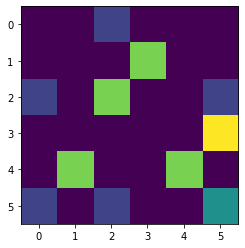

In [14]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -9


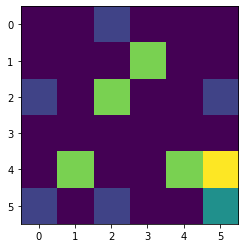

In [15]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -18


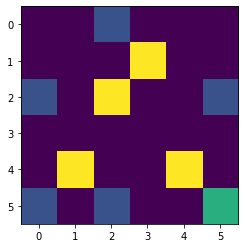

In [16]:
action = 3
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -18


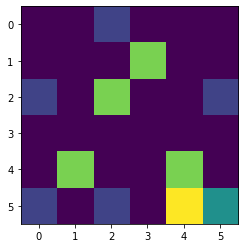

In [17]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -18


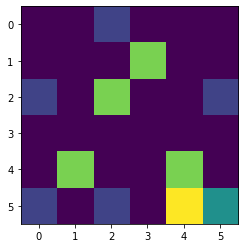

In [18]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -3


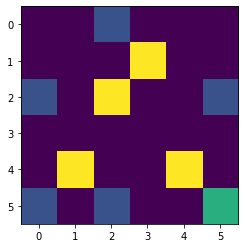

In [19]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 12


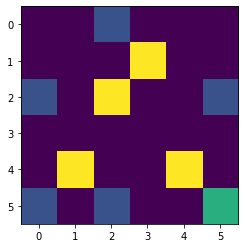

In [20]:
# Reaching goal reward earn you 15 pts.
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

In [115]:
class SarsaClass:
    def __init__(self, learning_rate, discount_factor, decay):
        # constructor initial states
        self.env = GridEnvironement()
        self.ql = np.zeros((36, 4))
        self.env.reset()
        self.current_state = int(np.where(self.env.state == 1)[0])
        # Need an Update base on iteration (output) 
        self.eps = 1
        self.all_rewards = []
        self.total_steps = []
        self.epsilon_decay = []
        self.list_ep = []
        # Input
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.eps_decay = epsilon_decay
    def reset(self):
        self.reward = 0
        self.done = False
        self.timestep = 0 # initial value for timestep
        self.agent_pos = [0, 0]
        self.state = 0
        self.env.done = False
        
    def greedy_algo(self, state):
       # np.seed(3)
        if np.random.rand() > self.eps:
            return np.argmax(self.ql[state])
        else:
            return np.random.randint(4)
    
    def sarsa_training(self, episodes):
        for ep in range(episodes):
            self.reset()
            #self.current_state = int(np.where(self.env.reset() == 1)[0])
            self.action = self.greedy_algo(self.state)
            # Append the episode for later use
            self.list_ep.append(ep)
            #print(self.action)
            total_reward = 0
            while not self.env.done:
                #print("Current State", self.current_state)
                #print("Chosen Action: ", self.action)
                self.ql[-1] = 0
                obs, reward, self.env.done, info = self.env.step(int(self.action))
                total_reward +=reward # accumulate rewards
                # update state
                next_state = (6*info['agent_pos'][0]) + info['agent_pos'][1]
                #if (1. in obs):
                 #   self.next_state = int(np.where(obs == 1)[0])
                #else: # we know we reached the terminal
                 #   self.next_state = 35
                next_action = self.greedy_algo(next_state)
                self.ql[self.state, self.action] = self.ql[self.state, self.action] + self.learning_rate *(reward + self.discount_factor*self.ql[next_state, next_action] - self.ql[self.state, self.action])
                self.state = next_state
                self.action = next_action
            self.all_rewards.append(total_reward)
            self.eps *= self.eps_decay
            self.epsilon_decay.append(self.eps)
            self.total_steps.append(info['time_steps'])
        
    def sarsa_algo_eval(self, episodes):
        self.total_steps = []
        self.all_rewards = []
        for ep in range(episodes):
            self.reset()
            self.action = self.greedy_algo(self.state)
            total_rewards = 0
            self.steps = 0
            while not self.env.done:
                self.ql[-1] = 0
                obs, reward, self.env.done, info = self.env.step(int(self.action))
                total_rewards+=reward
                # Get next state
                next_state = (6*info['agent_pos'][0]) + info['agent_pos'][1]
                next_action = self.greedy_algo(next_state)
                #if (1. in obs):
                 #   self.next_state = int(np.where(obs == 1)[0])
                #else: # we know we reached the terminal
                 #   self.next_state = 35
                self.ql[self.state, self.action] = self.ql[self.state, self.action] + self.learning_rate *(reward + self.discount_factor*self.ql[next_state, next_action] - self.ql[self.state, self.action])
                self.state = next_state
                self.action = next_action
                self.steps += info['time_steps']
            
            self.total_steps.append(self.steps)
            self.all_rewards.append(total_rewards)    
    def plotting(self, eval):
        if not eval:
            print("++++++++++++++++++++++++++++[Training]++++++++++++++++++++++++++++")
            print("Q-VALUES\n", self.ql)
            print("-------------------------[Reward Per Episode]-------------------------")
            plt.title('Cumulative reward per episode.')
            plt.plot(self.all_rewards)
            plt.show()
            print("-------------------------[Total Steps per Episode]-------------------------")
            plt.title('Total Steps per episode')
            plt.plot(self.total_steps)
            plt.show()
            print("-------------------------[Epsilon Decay]-------------------------")
            plt.title('Eps Decay')
            plt.plot(self.epsilon_decay)
            plt.show()
        else:
            print("++++++++++++++++++++++++++++[Eval]++++++++++++++++++++++++++++")
            print("Q-VALUES\n", self.ql)
            print("-------------------------[Reward Per Episode]-------------------------")
            plt.title('Cumulative reward per episode.')
            plt.plot(self.all_rewards)
            plt.show()
            print("-------------------------[Total Steps per Episode]-------------------------")
            plt.title('Total Steps per episode')
            plt.plot(self.total_steps)
            plt.show()
        

++++++++++++++++++++++++++++[Training]++++++++++++++++++++++++++++
Q-VALUES
 [[ 3.17493923e+00 -8.03116127e-01  1.00000000e+02  9.54163243e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.76447052e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.16424000e-03  0.00000000e+00  1.18800000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6

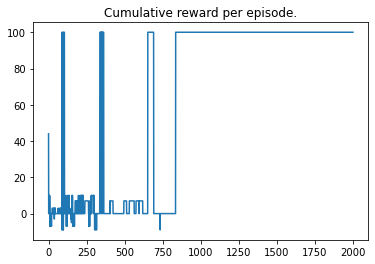

-------------------------[Total Steps per Episode]-------------------------


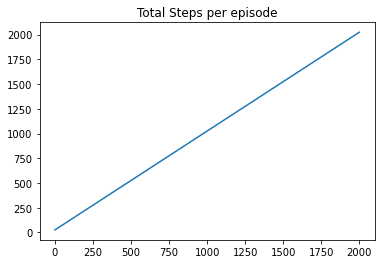

-------------------------[Epsilon Decay]-------------------------


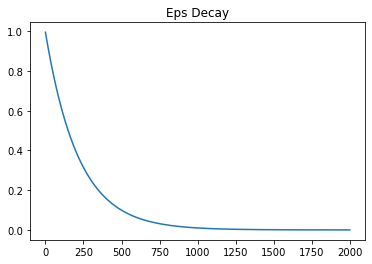

++++++++++++++++++++++++++++[Eval]++++++++++++++++++++++++++++
Q-VALUES
 [[ 3.17493923e+00 -8.03116127e-01  1.00000000e+02  9.54163243e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.76447052e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.16424000e-03  0.00000000e+00  1.18800000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.000

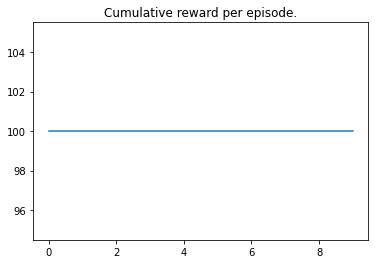

-------------------------[Total Steps per Episode]-------------------------


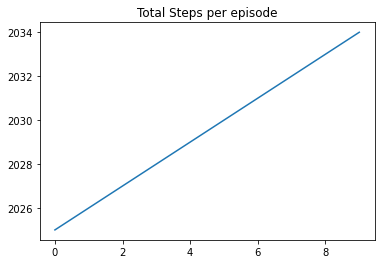

In [116]:
sarsa = SarsaClass(0.02, 0.99, 0.9954)
sarsa.sarsa_training(2000)
# Plotting
sarsa.plotting(False)
sarsa.sarsa_algo_eval(10)
sarsa.plotting(True)

In [85]:
# Extra Assigment: Q_Learning
class Q_Learning:
    def __init__(self, learning_rate, discount_factor, epsilon_decay):
        #States
        self.env = GridEnvironement()
        self.ql = np.zeros((36, 4)) # initialize q-learning for all s in S+
        #Input
        self.learning_rate = learning_rate
        self.eps_decay = epsilon_decay
        self.discount_factor = discount_factor
        # This variable will be updated
        self.current_state = None
        self.eps = 1
        #Output
        self.all_rewards = []
        self.total_steps = []
        self.epsilon_decay = []
    def greedy_algo(self, state):
        if np.random.rand() < self.eps:
            return np.random.randint(4)
        else:
            return np.argmax(self.ql[state])
        
    def q_learning_traning(self, episodes):
        for ep in range(episodes):
            self.env.reset()
            self.current_state = self.state
            total_reward = 0
            while not self.env.done:
                self.ql[-1] = 0
                self.action = self.greedy_algo(self.current_state)
                obs, reward, self.env.done, info = self.env.step(int(self.action))
                total_reward+=reward
                
                if (1. in obs): # update the state.
                    self.next_state = int(np.where(obs == 1)[0])
                else: # we know we reached the terminal
                    self.next_state = 35
                    
                self.ql[self.current_state, self.action] = self.ql[self.current_state, self.action]
                self.learning_rate * (reward +self.discount_factor* 
                                      np.argmax(self.ql[self.next_state])-
                                     self.ql[self.current_state, self.action])
                self.current_state = self.next_state
            #Update values and save some values in purpose of plotting.
            self.all_rewards.append(total_reward)
            self.total_steps.append(info['time_steps'])
            self.epsilon_decay.append(self.eps)
            self.eps *= self.eps_decay
    def qlearning_algo_eval(self, episodes):
        self.all_rewards = []
        self.total_steps = []
        for ep in range(episodes):
            self.current_state = int(np.where(self.env.reset() == 1)[0]) #get current state.
            total_reward = 0
            while not self.env.done:
                self.ql[-1] = 0
                self.action = self.greedy_algo(self.current_state)
                obs, reward, self.env.done, info = self.env.step(int(self.action))
                total_rewards+=reward
                # Get next state
                if (1. in obs):
                    self.next_state = int(np.where(obs == 1)[0])
                else: # we know we reached the terminal
                    self.next_state = 35
                self.ql[self.current_state, self.action] = self.ql[self.current_state, self.action]
                self.learning_rate * (reward +self.discount_factor* 
                                      np.argmax(self.ql[self.next_state])-
                                     self.ql[self.current_state, self.action])
                self.current_state = self.next_state
            self.total_steps.append(info['time_steps'])
            self.all_rewards.append(total_rewards)
            
    def plotting(self, eval):
        if not eval:
            print("++++++++++++++++++++++++++++[Training]++++++++++++++++++++++++++++")
            print("Q-VALUES\n", self.ql)
            print("-------------------------[Reward Per Episode]-------------------------")
            plt.title('Cumulative reward per episode.')
            plt.plot(self.all_rewards)
            plt.show()
            print("-------------------------[Total Steps per Episode]-------------------------")
            plt.title('Total Steps per episode')
            plt.plot(self.total_steps)
            plt.show()
            print("-------------------------[Epsilon Decay]-------------------------")
            plt.title('Eps Decay')
            plt.plot(self.epsilon_decay)
            plt.show()
        else:
            print("++++++++++++++++++++++++++++[Eval]++++++++++++++++++++++++++++")
            print("Q-VALUES\n", self.ql)
            print("-------------------------[Reward Per Episode]-------------------------")
            plt.title('Cumulative reward per episode.')
            plt.plot(self.all_rewards)
            plt.show()

None
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
21
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
6
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
7
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
11
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
19
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
18
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
31
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
18
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
1
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
18
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
19
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
21
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
18
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
34
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
10
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
18
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
26
3
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
0
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
23
2
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
24
1
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
8
0
.
.
.
.
.
.
.
.
.
.

.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
35
0
.
.
.
.
.
.
.
.
.
.
.


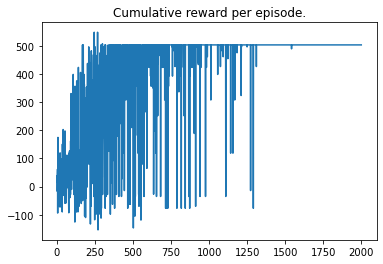

-------------------------[Total Steps per Episode]-------------------------


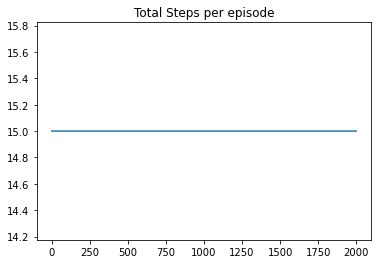

-------------------------[Epsilon Decay]-------------------------


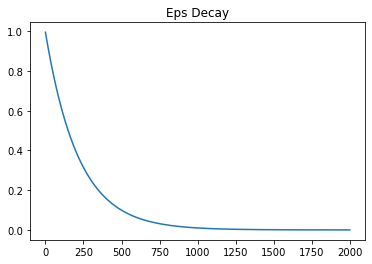

Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
Current State 0
Chosen Action:  0
++++++++++++++++++++++++++++[Eval]++++++++++++++++++++++++++++
Q-VALUES
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
-------------------------[Reward Per Episode]-

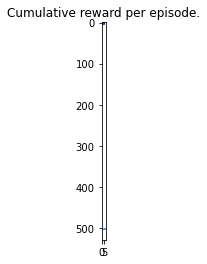

In [93]:
sarsa = SarsaClass(0.01, 0.99, 0.9954)
sarsa.sarsa_training(2000)
# Plotting
sarsa.plotting(False)
sarsa.sarsa_algo_eval(10)
sarsa.plotting(True)

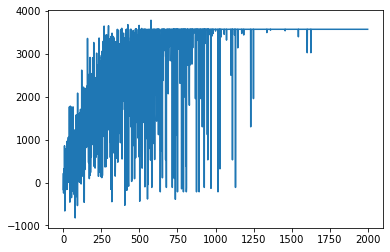

In [65]:
q_learning = Q_Learning(0.0001, 0.99, 0.9954)
q_learning.q_learning_traning(2000)
q_learning
        

# Environment Description: 
This environement motivated of social media suggested friends. We can look at the grid box as graph. Every cell is acquaintances or friends who do not have other friends to introduce you to, and some cells are the one who will get you to your future best friend. 
Action we have implemeneted: up, right, down, left. 
There are 36 states which 36 friends. Acquaintances their reward are ZEROS. 
Some connection have from as low as +3 to as high to +10. 



# Conclusions OF ENVIRONEMENT:
Environement is the visualization of Making connection and reaching that friend who will eventually become your best friend. 
Next step to work on: is to train the agent to reach the goal quick and meet best friend with making as low friend as possible along the way. Using SARSA ALGO, AND Q-LEARNING